In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate


In [4]:
path = Path(os.getcwd())/'data';path

PosixPath('/home/ubuntu/projects/dermai/data')

In [4]:
path.ls()

[PosixPath('/home/ubuntu/projects/dermai/data/Warts-Common-65.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-91.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Pityriasis-Rosea-128.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Tinea-Ringworm-Versicolor-188.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Psoriasis-41.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-389.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-68.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Drug-Eruptions-75.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-Hand-206.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-191.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-345.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Lichen-Planus-55.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Seborrheic-Keratoses-Ruff-43.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Psoriasis-Chr

In [5]:
fnames = get_image_files(path)ssss

In [6]:
fnames[:5]

[PosixPath('/home/ubuntu/projects/dermai/data/Warts-Common-65.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-91.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Pityriasis-Rosea-128.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Tinea-Ringworm-Versicolor-188.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Psoriasis-41.jpg')]

In [7]:
np.random.seed(2)
pat = re.compile(r'([\w-]+)-\d+\.jpg$')


In [8]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms = get_transforms(),
                                  size=299, bs=64 // 2).normalize(imagenet_stats)

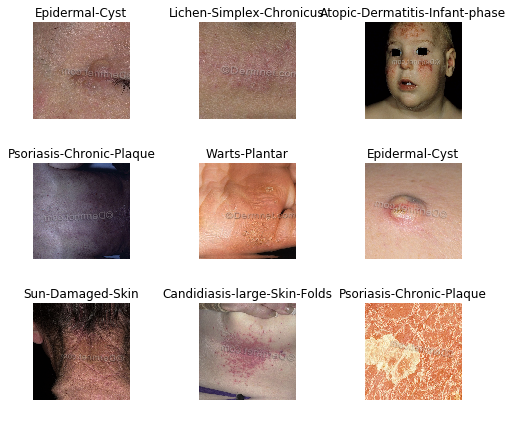

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
learn = create_cnn(data, models.resnet50, metrics = error_rate)

In [11]:
data.classes

['Warts-Common',
 'Keratoacanthoma',
 'Pityriasis-Rosea',
 'Tinea-Ringworm-Versicolor',
 'Psoriasis',
 'Herpes-Zoster',
 'Drug-Eruptions',
 'Eczema-Hand',
 'Lichen-Planus',
 'Seborrheic-Keratoses-Ruff',
 'Psoriasis-Chronic-Plaque',
 'Sun-Damaged-Skin',
 'Lichen-Simplex-Chronicus',
 'Urticaria-Acute',
 'Eczema-Nummular',
 'Intertrigo',
 'Seborrheic-Dermatitis',
 'Atopic-Dermatitis-Adult-Phase',
 'Malignant-Melanoma',
 'Eczema-Subacute',
 'Pyogenic-Granuloma',
 'Molluscum-Contagiosum',
 'Herpes-Cutaneous',
 'Phototoxic-Reactions',
 'Psoriasis-Scalp',
 'Allergic-Contact-Dermatitis',
 'Atypical-Nevi-Dermoscopy',
 'Erythema-Multiforme',
 'Viral-Exanthems',
 'Epidermal-Nevus',
 'Perioral-Dermatitis',
 'Candidiasis-large-Skin-Folds',
 'Rosacea',
 'Warts-Plantar',
 'Tinea-Ringworm-Groin',
 'Mucous-Cyst',
 'Basal-Cell-Carcinoma-Lesion',
 'Seborrheic-Keratosis-Irritated',
 'Dermatitis-Herpetiformis',
 'Chondrodermatitis-Nodularis',
 'Tinea-Ringworm-Body',
 'Stasis-Dermatitis-and-Ulcers',
 'Morph

In [65]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [1]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(18,18), dpi = 90)

NameError: name 'ClassificationInterpretation' is not defined

In [20]:
learn.unfreeze()

In [ ]:
learn.lr_find();learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate


In [ ]:
learn.fit_one_cycle(15, max_lr=slice(10e-6, 9e-5))

epoch,train_loss,valid_loss,error_rate
1,0.728788,1.401447,0.352601
2,0.738338,1.398289,0.357048
3,0.724687,1.421092,0.346376
4,0.660348,1.403211,0.355269
5,0.659821,1.423854,0.348155
6,0.552489,1.437945,0.354824
7,0.483127,1.429916,0.347710
8,0.441350,1.371083,0.335260
9,0.354210,1.427672,0.341040
10,0.307144,1.373737,0.341040


In [44]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-3))

Total time: 02:04
epoch  train_loss  valid_loss  error_rate
1      0.367025    0.416422    0.113320    (00:24)
2      0.366274    0.413611    0.107356    (00:24)
3      0.355481    0.397482    0.109344    (00:25)
4      0.323024    0.391653    0.107356    (00:24)
5      0.299460    0.390531    0.111332    (00:24)



In [13]:
interp = ClassificationInterpretation.from_learner(learn)

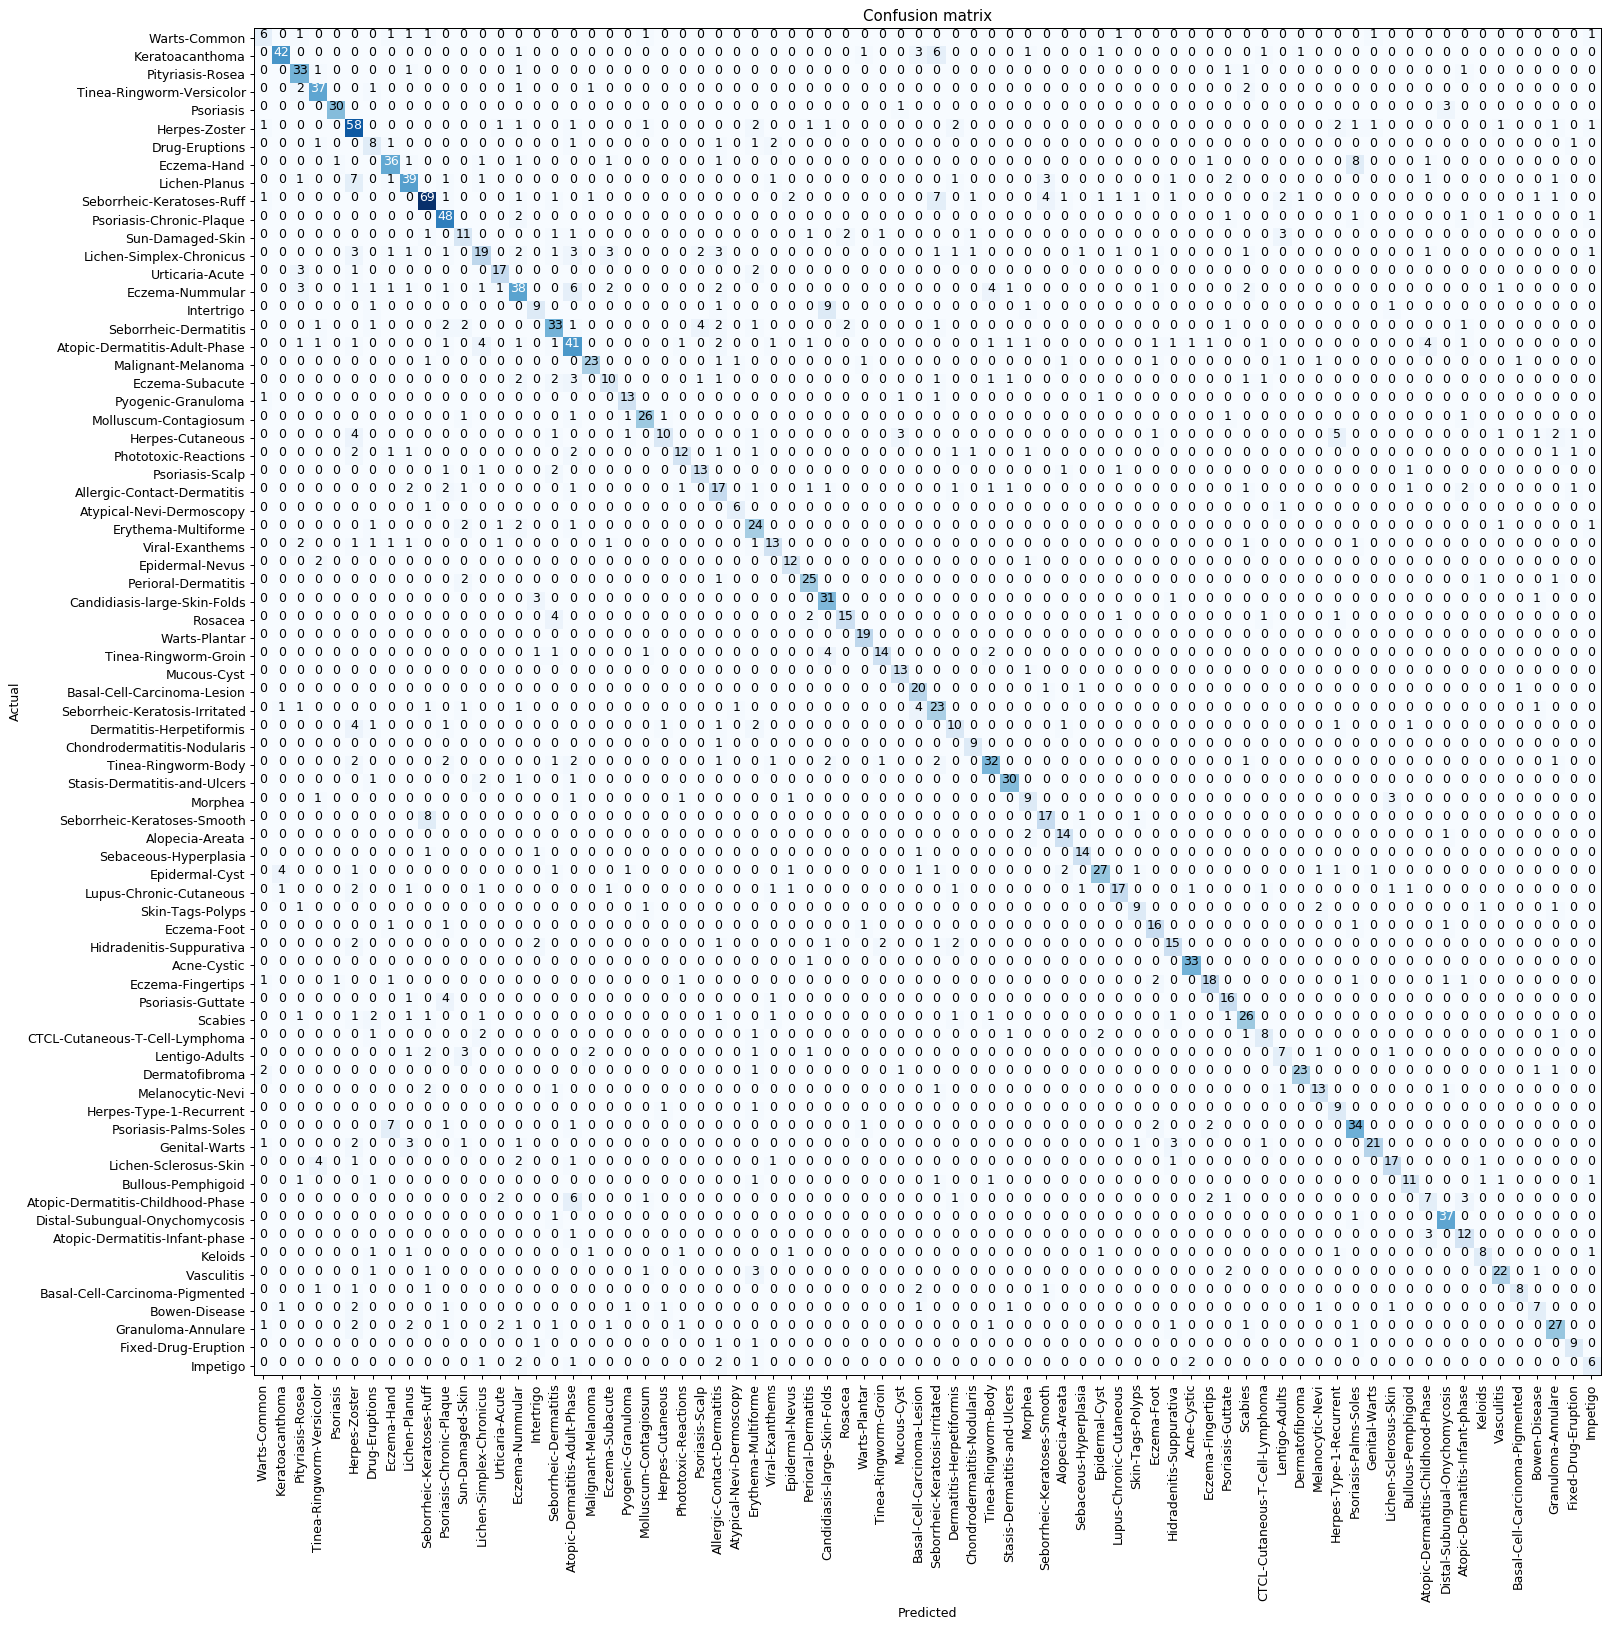

In [14]:
interp.plot_confusion_matrix(figsize=(18,18), dpi = 90)

In [12]:
learn.load('4')

In [19]:
interp.most_confused()

[('Intertrigo', 'Candidiasis-large-Skin-Folds', 9),
 ('Eczema-Hand', 'Psoriasis-Palms-Soles', 8),
 ('Seborrheic-Keratoses-Smooth', 'Seborrheic-Keratoses-Ruff', 8),
 ('Lichen-Planus', 'Herpes-Zoster', 7),
 ('Seborrheic-Keratoses-Ruff', 'Seborrheic-Keratosis-Irritated', 7),
 ('Psoriasis-Palms-Soles', 'Eczema-Hand', 7),
 ('Keratoacanthoma', 'Seborrheic-Keratosis-Irritated', 6),
 ('Eczema-Nummular', 'Atopic-Dermatitis-Adult-Phase', 6),
 ('Atopic-Dermatitis-Childhood-Phase', 'Atopic-Dermatitis-Adult-Phase', 6),
 ('Herpes-Cutaneous', 'Herpes-Type-1-Recurrent', 5),
 ('Seborrheic-Keratoses-Ruff', 'Seborrheic-Keratoses-Smooth', 4),
 ('Eczema-Nummular', 'Tinea-Ringworm-Body', 4),
 ('Seborrheic-Dermatitis', 'Psoriasis-Scalp', 4),
 ('Atopic-Dermatitis-Adult-Phase', 'Lichen-Simplex-Chronicus', 4),
 ('Atopic-Dermatitis-Adult-Phase', 'Atopic-Dermatitis-Childhood-Phase', 4),
 ('Herpes-Cutaneous', 'Herpes-Zoster', 4),
 ('Rosacea', 'Seborrheic-Dermatitis', 4),
 ('Tinea-Ringworm-Groin', 'Candidiasis-larg

In [30]:
len(data.classes)

74

In [32]:
interp.probs

tensor([[3.1600e-03, 2.1404e-02, 6.9942e-04,  ..., 1.2746e-03, 3.0325e-03,
         1.2052e-01],
        [7.5489e-05, 4.9267e-05, 5.2619e-04,  ..., 1.2657e-04, 1.3157e-04,
         1.1427e-04],
        [6.0050e-04, 9.3492e-01, 9.2783e-05,  ..., 1.3600e-03, 7.2667e-04,
         9.9279e-05],
        ...,
        [1.1331e-04, 3.1567e-04, 8.1489e-06,  ..., 3.1945e-05, 9.9069e-06,
         4.1470e-05],
        [1.0102e-03, 5.8691e-04, 6.9999e-04,  ..., 4.2875e-04, 2.1681e-03,
         3.8343e-04],
        [2.5362e-02, 1.8309e-02, 1.9472e-03,  ..., 4.7657e-04, 1.6578e-03,
         1.0402e-03]])

In [33]:
doc(learn.fit_one_cycle)